# Python for Machine Learning 

## Carter Hardy

### BMI 6018

### December 2, 2024

In [96]:
#Import needs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Description of assignment 
Demonstrate k-means clustering using the scikit learn package (50 points).

Calculate the sum of least square error for each different values of 'k'. Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points).

Plot the optimal clusters with their centroids along with a brief explanation (50 points). 

Comment your code as needed.

## Demonstrate k-means clustering using the scikit learn package 

In [97]:
#Import Arrhythmia data
df = pd.read_csv('/Users/carterhardy/BMI 6018/arrhythmia/arrhythmia.data', header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


In [98]:
#Create a subset of the dataframe of the first 15 rows
df_sub = df.iloc[:, :15]
#Create column headers for the 15 columns
columns = [
    "Age", 
    "Sex", 
    "Height", 
    "Weight", 
    "QRS duration", 
    "P-R interval", 
    "Q-T interval", 
    "T interval", 
    "P interval", 
    "QRS", 
    "T", 
    "P", 
    "QRST", 
    "J", 
    "Heart rate"
]

In [99]:
df_sub.columns = columns 

In [100]:
df_sub.head()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?


In [101]:
#Cleaning data
df_sub.replace("?", np.nan, inplace=True)

missing_percentage = df_sub.isnull().mean() * 100
print(missing_percentage)

#We see that J is missing a lot of data, heart rate is missing some and the categories we care about like height and weight are not 
#missing any.

Age              0.000000
Sex              0.000000
Height           0.000000
Weight           0.000000
QRS duration     0.000000
P-R interval     0.000000
Q-T interval     0.000000
T interval       0.000000
P interval       0.000000
QRS              0.000000
T                1.769912
P                4.867257
QRST             0.221239
J               83.185841
Heart rate       0.221239
dtype: float64


In [102]:
df1 = df_sub[['Age', 'Sex', 'Height', 'Weight', 'Heart rate']]
df1 = df1.replace("?", np.nan)
df1 = df1.dropna()
#I dropped the missing data in heart rate

df1 = df1[df1['Age'] >= 18]
#I filtered the data to only adults (people older than 18)

df1 = df1[(df1['Weight'] < 140) & (df1['Weight'] > 20)]
#Because this weight is in kilograms, I felt it made sense to take out the outliers that weighted more than 140 kg (308 lbs) and people
#who weighed less than 20 kg (44 lbs)

df1['Heart rate'] = pd.to_numeric(df1['Heart rate'])

X = df1[['Age', 'Height', 'Weight', 'Heart rate']] 

#Initialize the scaler
scaler = StandardScaler()

#We are adding in a scaler because the different units of measurements for height, weight, heart rate could change how kmeans intreprets 
#this. With a scaler, they should all be compared equally. 0 will be the mean and then each number going out from each side is a standard
#deviation away
X_scaled = scaler.fit_transform(X)

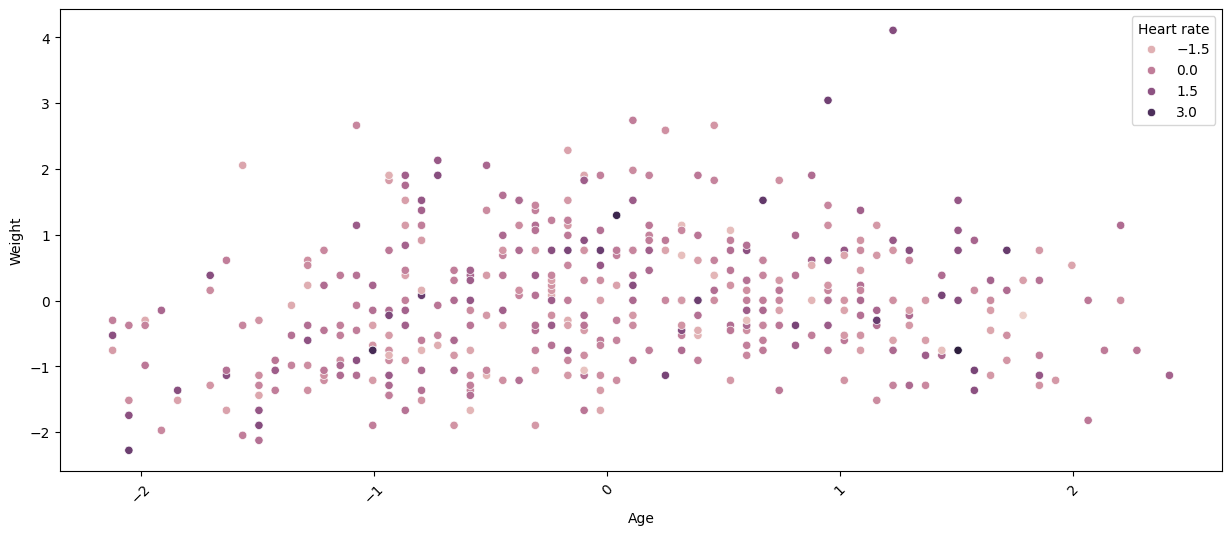

In [103]:
#Create a DataFrame from the scaled values for plotting
scaled_df = pd.DataFrame(X_scaled, columns=['Age', 'Height', 'Weight', 'Heart rate'])


#Plot the scaled data
plt.figure(figsize=(15, 6))
sns.scatterplot(data=scaled_df, x='Age', y='Weight', hue='Heart rate')
plt.xticks(rotation=45)
plt.show()

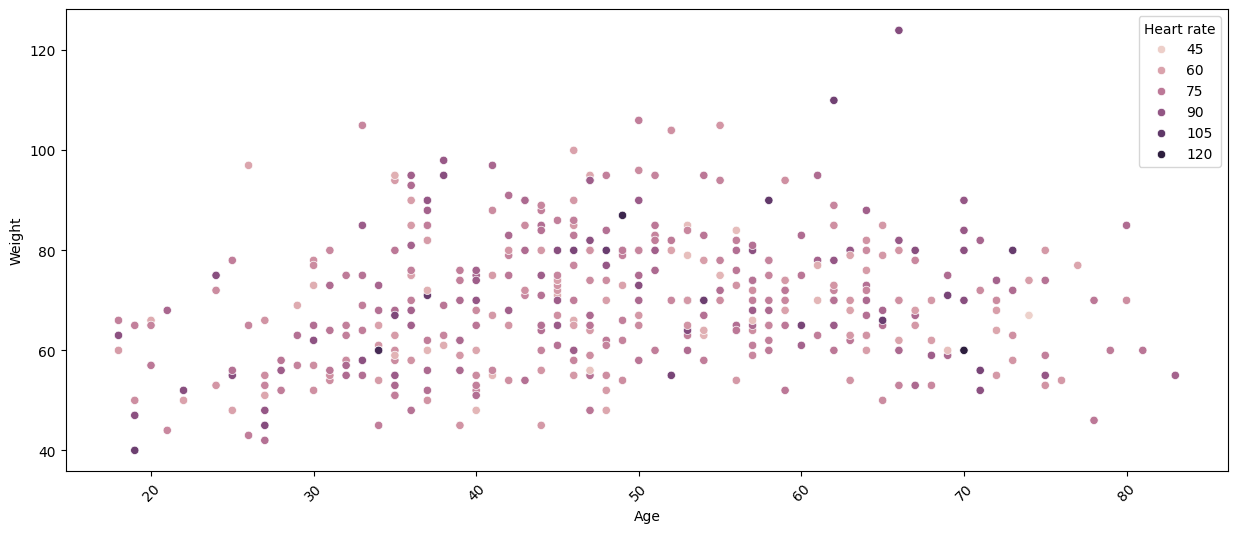

In [104]:
#This is the plot with the categories not scaled for comparison.
                                  
plt.figure(figsize=(15, 6))
sns.scatterplot(data = df1, x = 'Age', y = 'Weight', hue = 'Heart rate')
plt.xticks(rotation=45)
plt.show()

In [105]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Splitting the data set 
X_train, X_test, y_train, y_test = train_test_split(scaled_df[['Age', 'Weight']], scaled_df[['Heart rate']], test_size=0.33, random_state=0)

In [106]:
#Kmeans with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=10)
kmeans.fit(X_train)

KMeans(n_clusters=3, n_init=10, random_state=0)

[]

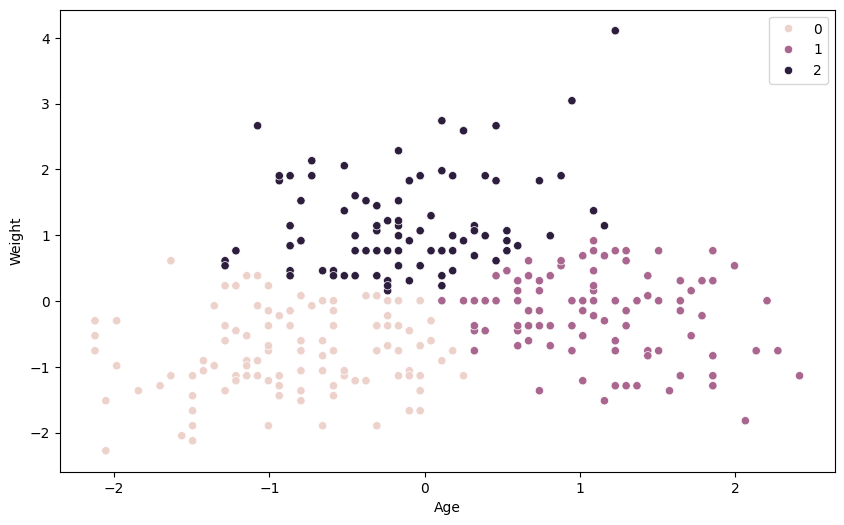

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'Age', y = 'Weight', hue = kmeans.labels_)
plt.plot()

## Sum of Least Square Error & Elbow Graph Method

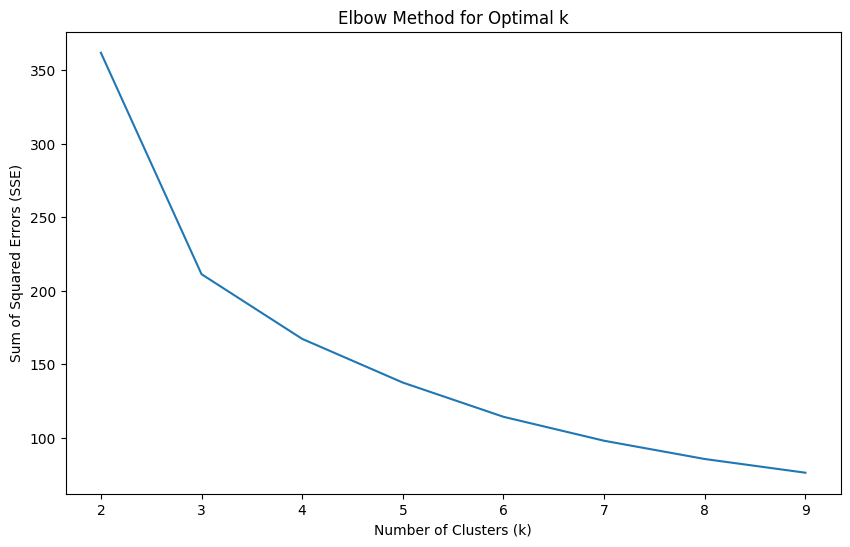

In [108]:
K = range(2,10)
fits = []
sse = []
for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train)
    fits.append(model)
    sse.append(model.inertia_)

plt.figure(figsize=(10,6))
sns.lineplot(x = K, y = sse)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

### Brief Explanation of Optimal Number of Clusters (k) Using the Elbow Method

The elbow method helps determine the optimal number of clusters by plotting the Sum of Squared Errors (SSE) against the number of clusters (k). The "elbow" appears where the SSE starts to decrease more slowly, indicating diminishing returns from adding more clusters. In this case, the bend occurs between 3 and 5 clusters. I selected 4 clusters because it offers a balance: the SSE improves slightly beyond 3, but adding more clusters beyond 4 does not provide significant improvement. Therefore, 4 clusters best represent the data in terms of optimization and simplicity.

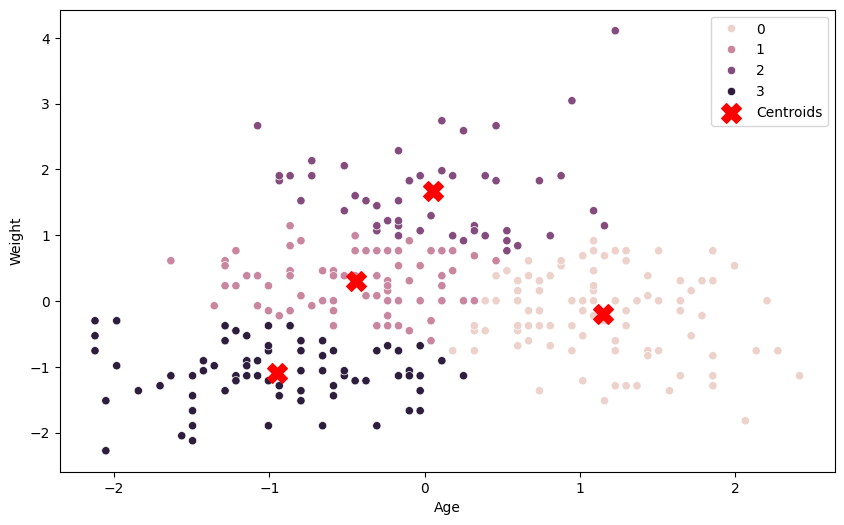

In [109]:
#Plot with 4 clusters, based on the recommendation intrepreted from the elbow graph.
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train,  x = 'Age', y = 'Weight', hue = fits[2].labels_)
centroids = fits[2].cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()

### Brief Explanation of Plotting the Optimal Clusters with Their Centroids

This plot shows the clusters formed by the KMeans algorithm, with the optimal number of clusters indicated. The centroids, represented by red 'X' marks, are the centers of each cluster. As mentioned earlier, 4 clusters in the optimal amount for our plot, as it effectively groups the data without over-clustering or under-clustering. 
The centroids represent the mean position of each cluster, providing a reference point for the distribution of data points within the cluster.